In [7]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

from pydap.net import create_session
from pydap.client import open_url
import pydap

# local imports
from helperLibrary import subset, crop, profileLocationPlot


In [ ]:
profilesETP = xr.open_dataset(
    "../data/ARGO_VortexProfiles/subsetProfiles/EasternTropicalPacific.nc"
)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={"projection": ccrs.PlateCarree()})
x = profilesETP['lon'].values
y = profilesETP['lat'].values
_, _, _, img = ax.hist2d(
    x, y, bins=(
        np.arange(-115, -92.5, 1.5),
        np.arange(5, 23.75, 1.5)
    ), cmap="viridis", cmin=25
)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
gl = ax.gridlines(
    draw_labels=True, xlocs=np.arange(-115, -90, 3),
    ylocs=np.arange(5, 25, 3), linewidth=0.5, color="gray", alpha=0.5
)
gl.top_labels = False
ax.set_title("Profile location histogram")
ax.set_extent([-115, -90, 5, 25], crs=ccrs.PlateCarree())
fig.colorbar(img, ax=ax, orientation="horizontal", pad=0.1, label="Number of Profiles")
plt.savefig(
    "../fig/ETP_LocationHistogram.png",
    bbox_inches="tight", dpi=300
)

In [ ]:
# Seasonal Histograms
fig, axs = plt.subplots(
    2, 2,
    figsize=(12, 10),
    subplot_kw={"projection": ccrs.PlateCarree()},
    constrained_layout=True,
)
axs = axs.flatten()
seasons = ["JFM", "AMJ", "JAS", "OND"]
month_range = {
    "JFM": [1, 2, 3],
    "AMJ": [4, 5, 6],
    "JAS": [7, 8, 9],
    "OND": [10, 11, 12]
}
for idx, season in enumerate(seasons):
    # Filter profiles for the current season 
    season_profiles = profilesETP.where(
        profilesETP["time.month"].isin(month_range[season]), drop=True
    )
    x_season = season_profiles["lon"].values
    y_season = season_profiles["lat"].values
    # Create 2D histogram for the current season
    _, _, _, img = axs[idx].hist2d(
        x_season, y_season, bins=(
            np.arange(-115, -92.5, 2.5),
            np.arange(5, 23.75, 2.5)
        ), cmap="viridis", cmin=25,
        vmin=25, vmax=250
    )
    axs[idx].set_extent([-115, -90, 5, 25], crs=ccrs.PlateCarree())
    axs[idx].add_feature(cfeature.LAND, facecolor="lightgray")
    axs[idx].add_feature(cfeature.COASTLINE)
    axs[idx].add_feature(cfeature.BORDERS, linestyle=":")
    gl = axs[idx].gridlines(
        draw_labels=True, linewidth=0.5, color="gray", alpha=0.5,
        xlocs=np.arange(-115, -90, 5), ylocs=np.arange(5, 25, 5)
    )
    gl.top_labels = False
    axs[idx].set_title(f"{season} Profiles")
    fig.colorbar(img, ax=axs[idx], orientation="horizontal", pad=0.05, label="Number of Profiles")

plt.suptitle("Seasonal Profile Distribution in the Eastern Tropical Pacific (minimum 25 profiles)", fontsize=16)
plt.savefig("seasonal_profile_distribution.png", dpi=300, bbox_inches="tight")

In [3]:
climatology = xr.merge(
    [salinityClimatology, tempClimatology]
)

In [60]:
ECCO2_url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/ECCO/ECCO2/cube92_daily/uvel'
ds_ECCO2 = xr.open_dataset(
    ECCO2_url,
    engine='pydap'
)

In [62]:
ds_ECCO2

<xarray.Dataset> Size: 2TB
Dimensions:  (time: 12051, lev: 50, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 96kB 1992-01-04 1992-01-05 ... 2024-12-31
  * lev      (lev) float64 400B 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    uvel     (time, lev, lat, lon) float32 2TB ...
Attributes:
    title:          ECCO2 cube92 daily average  Zonal Velocity
    Conventions:    ['COARDS', 'GrADS']
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/ecco2_cube92.php
    history:        Sun Jun 22 10:36:17 HST 2025 : imported by GrADS Data Ser...

In [43]:
climatology

<xarray.Dataset> Size: 4GB
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 1kB 20.5 21.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 580B -64.5 -63.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 232B 2.5 10.0 ... 1.975e+03
  * TIME                      (TIME) float32 720B 0.5 1.5 2.5 ... 178.5 179.5
Data variables:
    ARGO_SALINITY_MEAN        (PRESSURE, LATITUDE, LONGITUDE) float32 12MB ...
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 2GB ...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 12MB 1....
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 12MB 2e...
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 12MB ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 2GB ...

In [5]:
salinityClimatology = xr.open_dataset(
    "../data/ARGO_RG2019_Climatology/RG_ArgoClim_Salinity_2019.nc",
    decode_times=False
)
tempClimatology = xr.open_dataset(
    "../data/ARGO_RG2019_Climatology/RG_ArgoClim_Temperature_2019.nc",
    decode_times=False
)

In [8]:
timeOrigin = np.datetime64(
    datetime.strptime(
        tempClimatology['TIME'].time_origin, "%d-%b-%Y %H:%M:%S"))
tempClimatology['TIME'] = timeOrigin.astype('datetime64[M]') + \
    tempClimatology['TIME'].values.astype('timedelta64[M]')

timeOrigin = np.datetime64(
    datetime.strptime(
        salinityClimatology['TIME'].time_origin, "%d-%b-%Y %H:%M:%S"))
salinityClimatology['TIME'] = timeOrigin.astype('datetime64[M]') + \
    salinityClimatology['TIME'].values.astype('timedelta64[M]')

# Define the latitude and longitude ranges for subsetting
lat_range = (5, 23.75)
lon_range = (245, 267.5)

tempClimatology = subset(
    datasets=tempClimatology, lat_range=lat_range,
    # Ensure the variable names match the climatology datasets
    lon_range=lon_range, var_names=['LATITUDE', 'LONGITUDE', 'TIME']
)
salinityClimatology = subset(
    datasets=salinityClimatology, lat_range=lat_range,
    # Ensure the variable names match the climatology datasets
    lon_range=lon_range, var_names=['LATITUDE', 'LONGITUDE', 'TIME']
)

In [13]:
crop_lat_range = (18, 25)
crop_lon_range = (260, 270)

tempClimatology = crop(
    datasets=tempClimatology,
    var_names=['LATITUDE', 'LONGITUDE', 'TIME'],
    lat_range=crop_lat_range, lon_range=crop_lon_range
)
salinityClimatology = crop(
    datasets=salinityClimatology,
    var_names=['LATITUDE', 'LONGITUDE', 'TIME'],
    lat_range=crop_lat_range, lon_range=crop_lon_range
)

In [15]:
tempClimatology['ARGO_TEMPERATURE_MEAN'] = tempClimatology['ARGO_TEMPERATURE_MEAN'].sel(
    TIME=tempClimatology['TIME'].values[0],
    drop=True
)
salinityClimatology['ARGO_SALINITY_MEAN'] = salinityClimatology['ARGO_SALINITY_MEAN'].sel(
    TIME=salinityClimatology['TIME'].values[0],
    drop=True
)

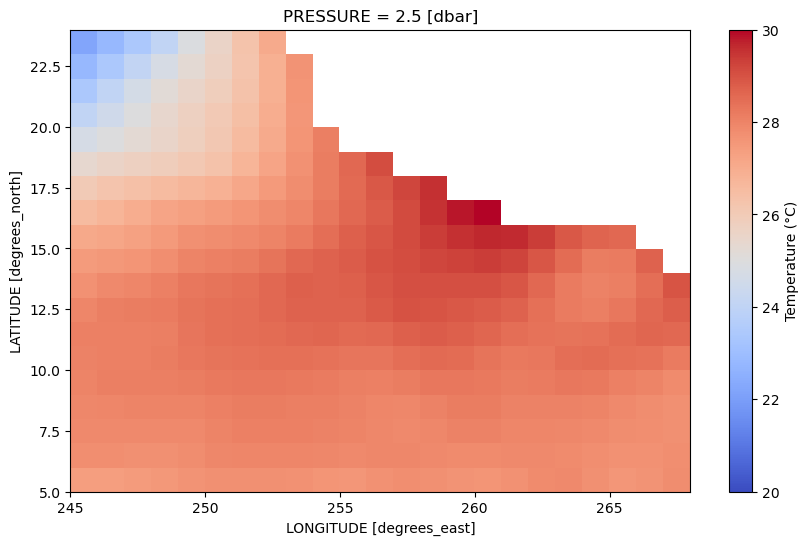

In [16]:
tempClimatology['ARGO_TEMPERATURE_MEAN'][0].plot.imshow(
    cmap='coolwarm', vmin=20, vmax=30,
    cbar_kwargs={'label': 'Temperature (°C)'},
    figsize=(10, 6)
)

In [22]:
sampleExtension = xr.open_dataset(
    "../data/ARGO_RG2019_Climatology/extensions/RG_ArgoClim_201901_2019.nc",
    decode_times=False
)

In [ ]:
timeOrigin = np.datetime64(
    datetime.strptime(
        sampleExtension['TIME'].time_origin, "%d-%b-%Y %H:%M:%S"))
sampleExtension['TIME'] = timeOrigin.astype('datetime64[M]') + \
    sampleExtension['TIME'].values.astype('timedelta64[M]')
sampleExtension = subset(
    datasets=sampleExtension,
    lat_range=(5, 23.75), lon_range=(245, 267.5),
    var_names=['LATITUDE', 'LONGITUDE', 'TIME']
)
sampleExtension = crop(
    datasets=sampleExtension,
    lat_range=(18, 25), lon_range=(260, 270),
    var_names=['LATITUDE', 'LONGITUDE', 'TIME']
)

<xarray.Dataset> Size: 24MB
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 1)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 1kB 20.5 21.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 580B -64.5 -63.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 232B 2.5 10.0 ... 1.975e+03
  * TIME                      (TIME) float32 4B 180.5
Data variables:
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 12MB ...
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 12MB ...